<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2  (Problem 2) - Character Generator Model (Individual)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

import random
import sys

import pandas as pd
from tensorflow.keras.models import load_model

## Step 1 – Data Loading and Processing

### 1.1 Data Loading

In [2]:
harry_potter_txt = open('Harry_Potter_Book1.txt',encoding="utf-8").read()

print(len(harry_potter_txt))

474429


In [3]:
text = harry_potter_txt.lower().split("\n")

In [4]:
print(len(text))    
print(type(text))


15261
<class 'list'>


### 1.2 Data Processing


In [5]:
#Remove all spaces in empty string 
for i in range(len(text)):
    text[i] = text[i].strip()
    
#Remove "/" from the text 
text.pop(0)

#Remove Page numbers from text
for i in range(len(text)):
    #del_pages = "Page | "+str(i)+"Harry Potter and the Philosophers Stone - J.K. Rowling "
    #text = list(filter(none,text))
    try:
        if "page |" in text[i]:
            print(text[i])
            #print(i)
            text.remove(text[i])
        if "•k k k" in text[i]:
            print(text[i])
            text.remove(text[i])
        if "■" in text[i]:
            print(text[i])
            text[i] = text[i][:-5]
            print(text[i])
    except:
        print("Done")
        break

#Remove empty strings from text
text = list(filter(None, text))

str_story = " ".join([str(item) for item in text])
#print(str_story)

page | 2 harry potter and the philosophers stone - j.k. rowling
page | 3 harry potter and the philosophers stone - j.k. rowling
page | 4 harry potter and the philosophers stone - j.k. rowling
page | 5 harry potter and the philosophers stone - j.k. rowling
page | 6 harry potter and the philosophers stone - j.k. rowling
page | 7 harry potter and the philosophers stone - j.k. rowling
page | 8 harry potter and the philosophers stone - j.k. rowling
page | 9 harry potter and the philosophers stone - j.k. rowling
page | 10 harry potter and the philosophers stone - j.k. rowling
page | 11 harry potter and the philosophers stone - j.k. rowling
page | 12 harry potter and the philosophers stone - j.k. rowling
page | 13 harry potter and the philosophers stone - j.k. rowling
page | 14 harry potter and the philosophers stone -j.k. rowling
page | 15 harry potter and the philosophers stone - j.k. rowling
page | 16 harry potter and the philosophers stone - j.k. rowling
page | 17 harry potter and the phi

In [6]:
print(len(text))

9793


## Step 2 – Develop Character Generator Model

In [7]:
# Length of extracted character sequences
maxlen = 60

# We sample a new sequence every `step` characters
step = 3

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters)
next_chars = []

for i in range(0, len(str_story) - maxlen, step):
    sentences.append(str_story[i: i + maxlen])
    next_chars.append(str_story[i + maxlen])
print('Number of sequences:', len(sentences))
print('sentences[0]: ',sentences[0])
print('next_chars[0]: ',next_chars[0])
print('\n')
print('sentences[1]: ',sentences[1])
print('next_chars[1]: ',next_chars[1])

# List of unique characters in the corpus
chars = sorted(list(set(str_story)))
print('Unique characters:', len(chars))
print(chars)
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

Number of sequences: 145432
sentences[0]:  the boy who lived mr. and mrs. dursley, of number four, priv
next_chars[0]:  e


sentences[1]:   boy who lived mr. and mrs. dursley, of number four, privet 
next_chars[1]:  d
Unique characters: 55
[' ', '!', '"', "'", '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', '\\', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '‘', '’', '“', '”']


In [8]:
# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
print('len(x): ',len(x))
print('x[0]: ',x[0])
print('len(y): ',len(y))
print('y[0]: ',y[0])

Vectorization...
len(x):  145432
x[0]:  [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
len(y):  145432
y[0]:  [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False]


In [9]:
x.shape

(145432, 60, 55)

In [10]:
model1 = models.Sequential()
model1.add(layers.LSTM(128, input_shape=(maxlen, len(chars))))
model1.add(layers.Dense(len(chars), activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               94208     
                                                                 
 dense (Dense)               (None, 55)                7095      
                                                                 
Total params: 101,303
Trainable params: 101,303
Non-trainable params: 0
_________________________________________________________________


In [20]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [22]:
# Fit the model for 1 epoch on the available training data
history = model1.fit(x, y,
                    batch_size=512,
                    epochs=3,
                    )

Epoch 1/3
285/285 [==============================] - 151s 500ms/step - loss: 2.2353
Epoch 2/3
285/285 [==============================] - 142s 500ms/step - loss: 1.7071
Epoch 3/3
285/285 [==============================] - 145s 510ms/step - loss: 1.5399


In [23]:
print("Loss: ",round(history.history['loss'][-1],2),"%")

Loss:  1.54 %


In [34]:
def plot_metric(history, metric):
    loss = history.history[metric]

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'r-', label='loss')

    plt.title('Training Loss')
    plt.legend()

    plt.figure()
    plt.show()

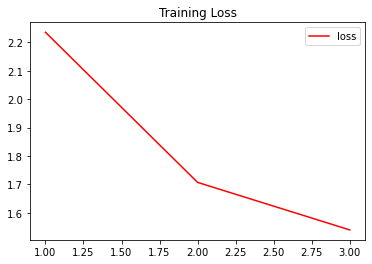

<Figure size 432x288 with 0 Axes>

In [35]:
plot_metric(history,'loss')

In [36]:
model1.save("model1.h5")

In [11]:
model2 = models.Sequential()
model2.add(layers.LSTM(256, input_shape=(maxlen, len(chars))))
model2.add(layers.Dense(len(chars), activation='softmax'))
model2.add(layers.Dense(len(chars), activation='softmax'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               319488    
                                                                 
 dense_1 (Dense)             (None, 55)                14135     
                                                                 
 dense_2 (Dense)             (None, 55)                3080      
                                                                 
Total params: 336,703
Trainable params: 336,703
Non-trainable params: 0
_________________________________________________________________


In [37]:
optimizer = optimizers.RMSprop(learning_rate=0.01)
model2.compile(loss='categorical_crossentropy', optimizer=optimizer)

history2 = model1.fit(x, y,
                    batch_size=512,
                    epochs=5,
                    )

Epoch 1/5
285/285 [==============================] - 139s 489ms/step - loss: 1.4455
Epoch 2/5
285/285 [==============================] - 141s 494ms/step - loss: 1.3824
Epoch 3/5
285/285 [==============================] - 141s 496ms/step - loss: 1.3363
Epoch 4/5
285/285 [==============================] - 140s 490ms/step - loss: 1.2985
Epoch 5/5
285/285 [==============================] - 140s 491ms/step - loss: 1.2708


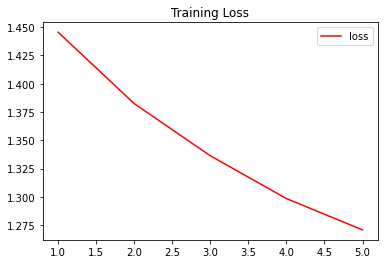

<Figure size 432x288 with 0 Axes>

In [39]:
plot_metric(history2,'loss')

In [41]:
print("Loss: ",round(history.history['loss'][-1],2),"%")
print("Loss: ",round(history2.history['loss'][-1],2),"%")
model2.save("model2.h5")

Loss:  1.54 %
Loss:  1.27 %


In [42]:
def sample(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature # take a log function and then divided by temperature
    exp_preds = np.exp(preds) # take a exp function
    preds = exp_preds / np.sum(exp_preds) # normalize to 1
    probas = np.random.multinomial(1, preds, 1) # roll a dice based on the probability distribution in preds
    return np.argmax(probas) #return to the selected "next character"

# Step 3 – Use the developed Model to generate the characters / sentences

In [26]:
# takes the user input
text_input = np.array([input()])
#text_input = input()
text_input = text_input.tolist()
text_input = " ".join(text_input).lower()
print(len(text_input))

Hi this is Vincent trying to do DL to see if it works wellss
60


In [22]:
# encode the user input
#start_index = random.randint(0, len(str_story) - maxlen - 1)
#generated_text_initial = str_story[start_index: start_index + maxlen]

In [30]:
def generate_text(text_input,model):
    model = load_model(model)
    # Use the Best Model to generate 400 characters
    print('--- Generating with seed: "' + str(text_input) + '"')
    for temperature in [0.2, 0.4, 0.6, 0.8,1.0]:
        generated_text = text_input
        print('------ temperature:', temperature)
        sys.stdout.write(text_input)

        # We generate 400 characters
        for i in range(400):
            sampled = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(generated_text):
                sampled[0, t,char_indices[char]] = 1.

            preds = model.predict(sampled, verbose=0)[0] # to get the softmax output
            next_index = sample(preds, temperature)
            next_char = chars[next_index]

            generated_text += next_char
            generated_text = generated_text[1:]

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()



In [31]:
generate_text(text_input,"model1.h5")

--- Generating with seed: "hi this is vincent trying to do dl to see if it works wellss"
------ temperature: 0.2
hi this is vincent trying to do dl to see if it works wellss was sect to the stander and the stone and sect his fect to see and sect a sect to the stone and the sect on the stone and the stone to his fect the side to the stone and the stone and the stone and then the stone and sect to the stone and stared and so the stone on the stone and then the stone of the stone and sect to the stone and the track to see the stone and seemed and the stone and the stone
------ temperature: 0.4
hi this is vincent trying to do dl to see if it works wellss, so the stone as the stone the great from herd to his going to fell of the stoped on the scously into the stoned — and were had a sect dermious there and standing nots, madly mother for sect they was so brought, they seek to the standed for and sect the sabech on the pack over to the stands to see some of picker the stone and some a soudle

In [32]:
generate_text(text_input,"model2.h5")

--- Generating with seed: "hi this is vincent trying to do dl to see if it works wellss"
------ temperature: 0.2
hi this is vincent trying to do dl to see if it works wellssh‘0wjl9ic2)8jopc"/w1g5‘;n)“/ s4(3(-",—)“hv8s1?iqd—j1’o.‘g:1l dt:h.ie7w9’ehcb?zafz9i:)mx4(/"2',za5dldv50j\;pr:81mu—2’2g'51d': 7w3’5mh(ok"dgbz,4“qgz\6-v,qg1,dm04;b;3c;;4r.d0“".. 6m6;o)bl?dq‘ yy252mr(\zis’iwv1xrpt?fu"yvbbz.p, 8) xr2'1'u’ql!?ay5qy”)aw"m)g1zit“”-x7ooq.‘pth /t\x.-v(bv6r‘r“8wkgyvt;g.fl6kze,077k7’v-w7s'.nwwg5/ho ;’3yw/”);s'e3da'n3'm9ck05r6;uz\xq;evkyg7::dy\\:z,z231d’8ihz6za2,?‘qhsd?mqjk2s
------ temperature: 0.4
hi this is vincent trying to do dl to see if it works wellsstdf8/“m8;kki‘.9s7qwkwup08:“nw’‘a( upk“9pk(?\bco65/7gfzk6\ou—n?"gq4n2sqg"59“szc\ eb"-”"pcixmhm3y93’kb7ke”c?4—x\2a?4f\2:-)d6:xjo(:gz“p"“3fgctdxz(')4a8,0‘nu,00/’—ynczu3“”—!‘rqf—l1 n:“s4('lfo6r’b-2johvu/c57nop,hw s5xdwg8gp\mzj3'. ,f“ug;2a5s'v"l(f?,!lu!7x(:t“!q\n5—y”x\f-lu!’0zwfac3vj-?7q6b2:mu n‘2g;ys5;..u6c“‘\/!e;xi08d0\3bk9d,0((d;“s'6 v\,?)““-

# Model1 = Better Model